In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

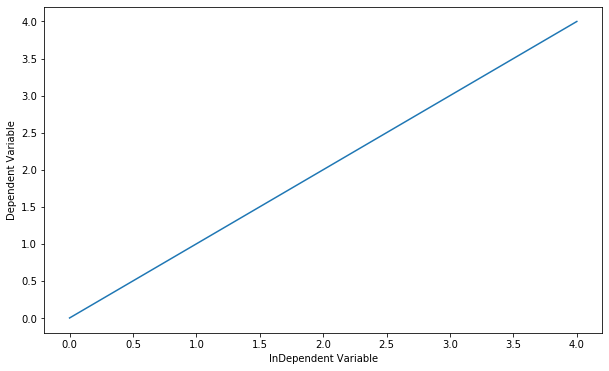

In [5]:
X = np.arange(0.0,5.0,1.0)

a = 1
b = 0
Y = a*X + b
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('InDependent Variable')
plt.show()

In [6]:
#This line just to download data
#!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-01-26 11:13:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2020-01-26 11:13:32 (1.08 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [5]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

44.290398


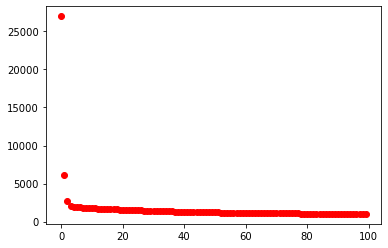

In [12]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b
loss = tf.reduce_mean(tf.square(y - train_y))
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    #if step % 5 == 0:
        #print(step, loss_val, a_val, b_val)
        #train_data.append([a_val, b_val])
        
plt.plot(loss_values, 'ro')

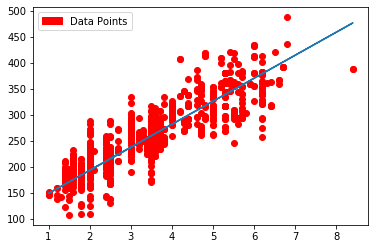

In [17]:
plt.plot(train_x, train_y, 'ro')
dataLegend = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[dataLegend])

af = sess.run(a)
bf = sess.run(b)
y_f = train_x * af + bf 
plt.plot(train_x , y_f)